<a href="https://colab.research.google.com/github/divyansh-ag-03/IAIML/blob/main/IAIML_Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url  = "https://raw.githubusercontent.com/divyansh-ag-03/IAIML/main/Datasets/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv"
CarDekho = pd.read_csv(url)

In [3]:
# Display the first 5 rows
CarDekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Display the last 5 rows
CarDekho.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
CarDekho.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
# Check the shape of the DataFrame (rows, columns)
CarDekho.shape

(4340, 8)

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

In [7]:
# Putting feature variable to X
X = CarDekho['year']
X.head()

0    2007
1    2007
2    2012
3    2017
4    2014
Name: year, dtype: int64

In [8]:
# Putting response variable to y
y = CarDekho['selling_price']
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

## Splitting Data into Training and Testing Sets

In [9]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3038,)
(3038,)
(1302,)
(1302,)


In [11]:
import numpy as np
#numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

<ipython-input-11-af1b7137a699>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
<ipython-input-11-af1b7137a699>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3038, 1)
(3038,)
(1302, 1)
(1302,)


## Performing Linear Regression

In [13]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficients Calculation

In [14]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

-111199583.91744867
[55487.67585252]


## Predictions

In [15]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

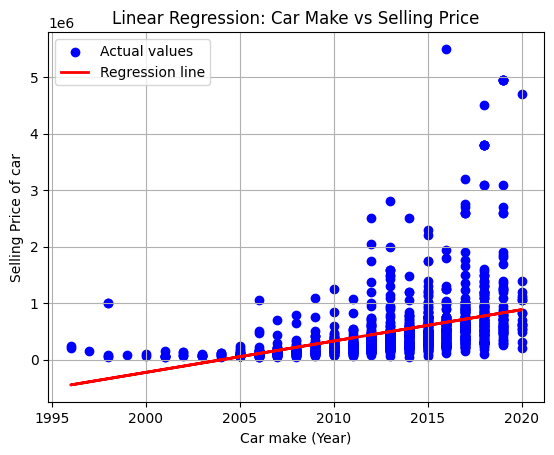

In [16]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(X_test, y_test, c='blue', label='Actual values')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('Car make (Year)')
plt.ylabel('Selling Price of car')
plt.title('Linear Regression: Car Make vs Selling Price')
plt.legend()
plt.grid(True)
plt.show()
